**Name: Rana Mohamed**


**ID : 5**

**Importing Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

**Loading DataSet**

In [ ]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print("Train Images Shape: ", train_images.shape)
print("Train Labels Shape: ", train_labels.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Labels Shape: ", test_labels.shape)

Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


**Data Normalization**

In [ ]:
# Preprocessing of the data
train_images = train_images / 255.0
test_images = test_images / 255.0

**Data Visualization**

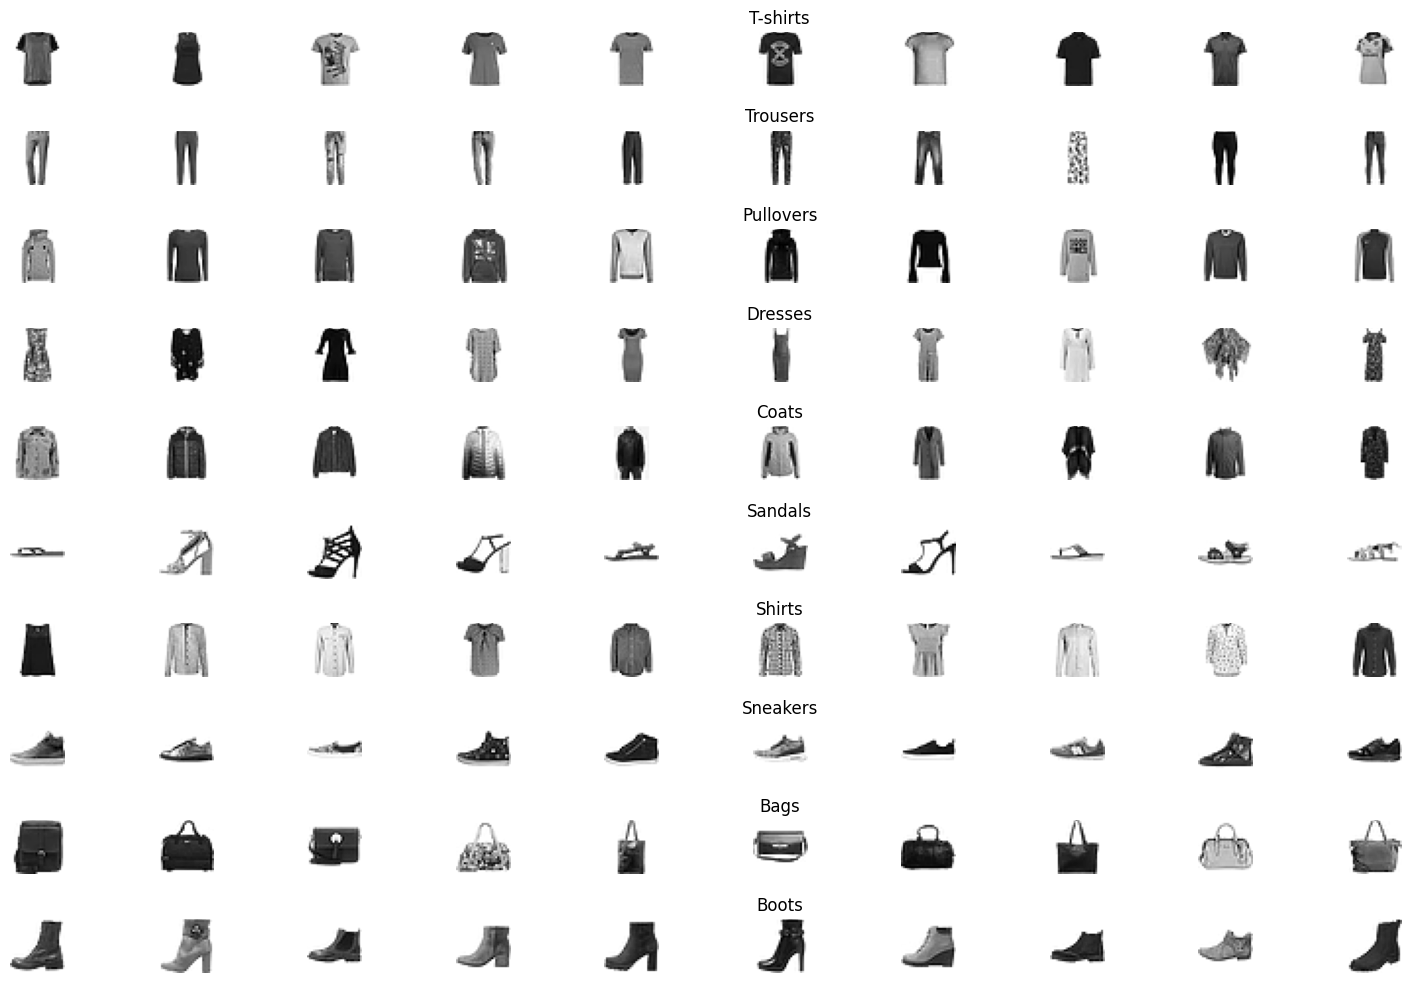

In [ ]:
#printing sample of the dataset

classes_names = ['T-shirts', 'Trousers', 'Pullovers', 'Dresses', 'Coats', 'Sandals', 'Shirts', 'Sneakers', 'Bags', 'Boots']
x_class_num = []
n_rows = 10 # because there are 10 different classes in this fashion mnist
n_cols = 10

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
fig.tight_layout()

for j in range(n_rows):
    for i in range(n_cols):
        x_select = train_images[train_labels == j]  #select images that belongs to the jth class from train images
        ax[j][i].imshow(x_select[random.randint(0, len(x_select) - 1), :, :], cmap=plt.cm.binary)
        ax[j][i].axis("off")
        if i == 5:
            ax[j][i].set_title(classes_names[j])


plt.show()


**Neural Network Model**

In [ ]:
# building neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train the model and store the results(accuracy,loss) in history object
history = model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8932 - loss: 0.2913
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8969 - loss: 0.2776
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8997 - loss: 0.2738
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9034 - loss: 0.2585
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9081 - loss: 0.2503
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9099 - loss: 0.2411
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9146 - loss: 0.2286
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9181 - loss: 0.2213


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

**Visualizing Accuracy and Loss during Training**

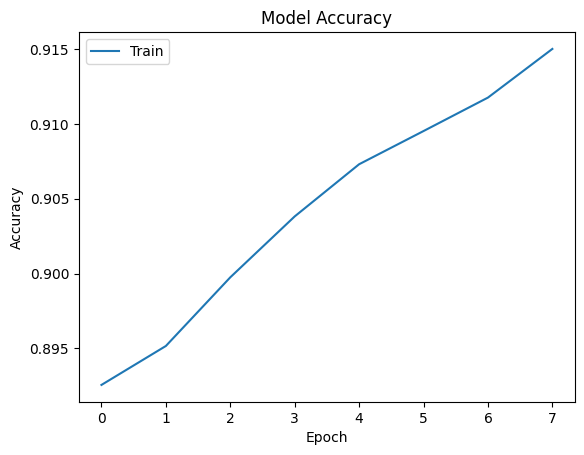

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

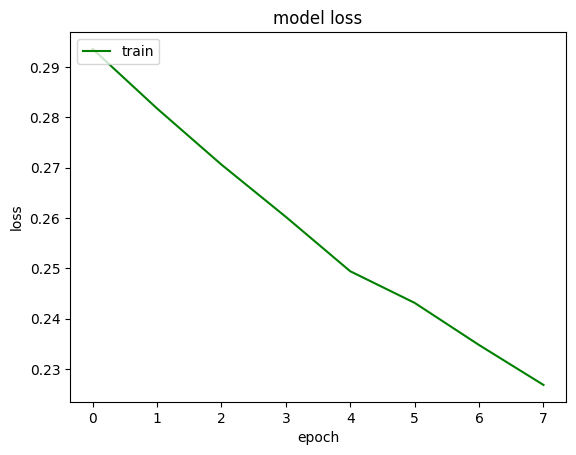

In [ ]:
plt.plot(history.history['loss'],color = 'green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()


**Model Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.8857 - loss: 0.3206

Test accuracy: 0.885699987411499


In [ ]:
# make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


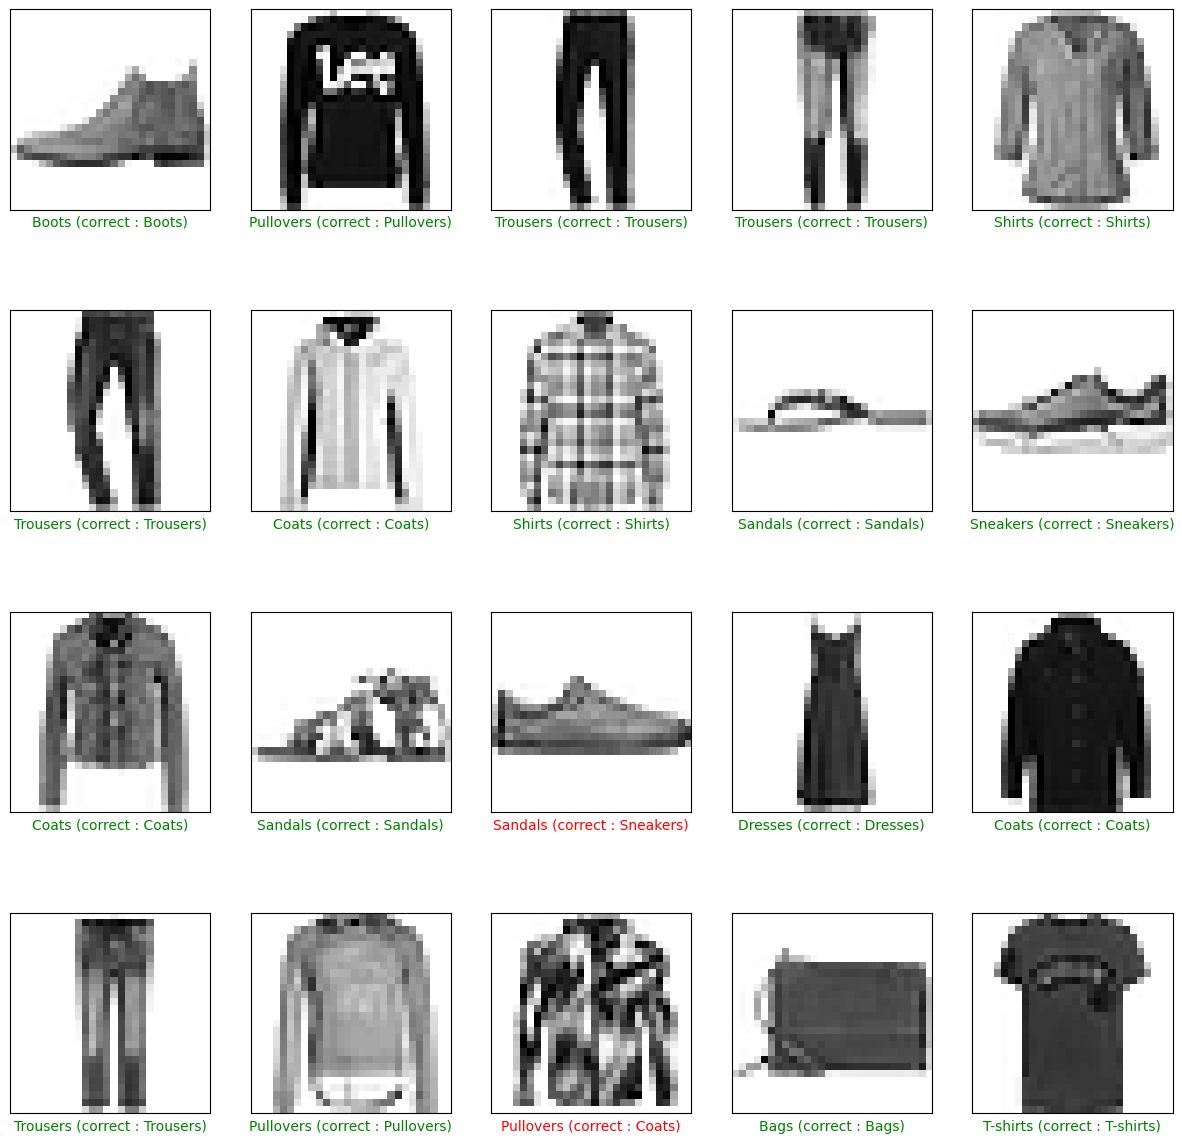

In [ ]:
# visualize some predictions
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(4,5,i+1)
  #for a better display i removed grid and x and y ticks
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  #finding the index of the class with highest probability from the output of the sigmoid func
  predicted_label =  np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel(f"{classes_names[predicted_label]} (correct : {classes_names[true_label]})", color=color)

plt.show()

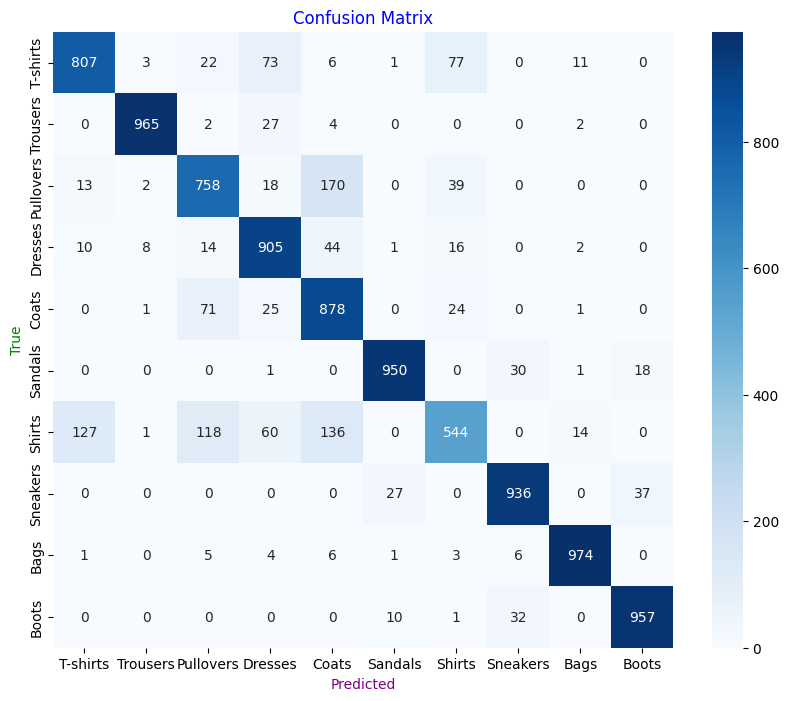

In [ ]:
from sklearn.metrics import confusion_matrix
pred_classes = np.argmax(predictions, axis=1)

# calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_classes)

# plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel('Predicted',color = 'purple')
plt.ylabel('True', color = 'green')
plt.title('Confusion Matrix',color = 'blue')
plt.show()